Étude de cas : speed dating

# Introduction

Les données sont proposées sur Kaggle à l'adresse https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating avec la préface suivante :

*This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.*

*From http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/*

Ce jeu de données présente plusieurs problèmatiques possibles. On cherchera ici à quantifier dans quelle mesure les différentes préférences exprimées se traduisent par une rencontre à la suite du speed-dating. 


L'application envisagée serait du point de vue des organisateurs pour décider de 'qui' rencontre 'qui'. 
Chacun rencontre tous les autres ici, ce qui est possible du fait du petit nombre de personnes, mais il faudrait choisir les gens au hasard avec plus de monde. 
Et les sites de rencontre sont un contexte similaire à encore plus grande échelle. 

# Mise en place

## Import et lecture des données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_in='speeddating.csv'
data_ini=pd.read_csv(file_in)
data_ini.shape

(8378, 123)

In [3]:
pd.set_option('display.max_columns', None)
data_ini.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

## Pré-traitement des données

### Retrait des colonnes sans informations

Une grande partie des colonnes contient des éléments superflus, sous forme de regroupement des données par classes (par exemple de 0 à 5, de 6 à 8 et de 9 à 10). Ces colonnes commencent par 'd_' et seront supprimées. 
La première colonne est également inutilisée.

On passe ainsi de 123 à 66 colonnes, dont on va voir l'aspect général.

In [4]:
cols_i=data_ini.columns
cols=[]
for i in cols_i :
    if i[0:2] != 'd_' :
        cols.append(i)
cols=cols[1:]

data=data_ini[cols]

print(data.shape)

(8378, 66)


In [5]:
pd.set_option('display.max_columns', None)
data.head(11)

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',35.00,20.00,20.00,20.00,0.00,5.00,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'0',b'0'
1,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',60.00,0.00,0.00,40.00,0.00,0.00,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,b'1',b'0',b'0'
2,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'Law',19.00,18.00,19.00,18.00,14.00,12.00,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,b'1',b'1',b'1'
3,1.0,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',30.00,5.00,15.00,40.00,5.00,5.00,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,b'1',b'1',b'1'
4,1.0,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,b'Law',30.00,10.00,20.00,10.00,10.00,20.00,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,b'1',b'1',b'1'
5,1.0,b'female',21.0,25.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',50.00,0.00,30.00,10.00,0.00,10.00,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,3.0,2.0,4.0,6.0,5.0,0.0,b'0',b'1',b'0'
6,1.0,b'female',21.0,30.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',35.00,15.00,25.00,10.00,5.00,10.00,3.0,6.0,7.0,5.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,7.0,4.0,6.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.34,3.0,2.0,4.0,6.0,5.0,0.0,b'1',b'0',b'0'
7,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',33.33,11.11,11.11,11.11,11.11,22.22,6.0,7.0,5.0,6.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,6.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.50,3.0,2.0,4.0,6.0,7.0,NaN,b'0',b'0',b'0'
8,1.0,b'female',21.0,28.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'Law',50.00,0.00,25.00,10.00,0.00,15.00,7.0,7.0,8.0,8.0,8.0,9.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.

### Réécriture de termes peu lisibles

Je vais aussi remplacer les cases avec des b' ', en particulier quand le résultat devient un nombre, et raccourcir les champs trop longs, pour faciliter le traitement.
Je corrige aussi les typos au passage.

In [6]:
#colonnes
dic_rename={'attractive_important':'pref_attractive', 'sincere_important':'pref_sincere',
            'intellicence_important':'pref_intelligence', 'funny_important':'pref_funny', 
            'ambtition_important':'pref_ambition', 'shared_interests_important':'pref_shared_interests',
            'sinsere_o':'sincere_o', 'ambitous_o':'ambitious_o'
           }
data=data.rename(columns=dic_rename, inplace=False)

In [7]:
#cellules
dic={"b'1'": 1, "b'0'" : 0, 
     "b'male'" : "Male", "b'female'" : "Female",
     "b'?'":"Other", "b'Asian/Pacific Islander/Asian-American'":"Asian", 
     "b'Black/African American'":"Black", "b'European/Caucasian-American'":"European",
     "b'Latino/Hispanic American'":"Latino", "b'Other'":"Other"
    }
data=data.replace(dic, inplace=False)     

data.decision=data.decision.astype(bool)
data.decision_o=data.decision_o.astype(bool)
data.match=data.match.astype(bool)


### Correction de valeurs hors intervalle de définition

Certaines valeurs doivent être dans 1-10 mais sont à 0 : on les monte à 1.

In [8]:
data.loc[data['importance_same_race'] == 0,'importance_same_race']=1


Les préférences pour les différents attributs doivent valoir 100 au total. On les modifie proportionnelement.

In [9]:
ind_pref_o=data.columns[10:16]
ind_pref=data.columns[22:28]

#Test si les préférences valent toutes 100 au total :
pref_tot=  data[ind_pref[0]]
pref_tot_o=data[ind_pref_o[0]]
for i in range(1,6) :
    pref_tot=  pref_tot+  data[ind_pref[i]]
    pref_tot_o=pref_tot_o+data[ind_pref_o[i]]

# plt.plot(pref_tot)
data['pref_tot']=  pref_tot
data['pref_tot_o']=pref_tot_o


In [10]:
#Mise à jour
for i in range(6) :
    data[ind_pref[i]]=data[ind_pref[i]]*100/data.pref_tot
    data[ind_pref_o[i]]=data[ind_pref_o[i]]*100/data.pref_tot_o
        

In [11]:
# pref_tot=  data[ind_pref[0]]
# pref_tot_o=data[ind_pref_o[0]]
# for i in range(1,6) :
#     pref_tot=  pref_tot+  data[ind_pref[i]]
#     pref_tot_o=pref_tot_o+data[ind_pref_o[i]]

# plt.plot(pref_tot)


### Ajout de colonnes

Identifiant de l'utilisateur

In [12]:
# On créé un identifiant du sujet
uid=np.zeros(data.shape[0])
ind_ct=['wave', 'gender', 'age', 'race', 'importance_same_race', 'importance_same_religion', 'field',
       'pref_attractive', 'pref_sincere',
       'pref_intelligence', 'pref_funny', 'pref_ambition',
       'pref_shared_interests', 'attractive', 'sincere', 'intelligence',
       'funny', 'ambition', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'
       ]

id=0
for i in range(1,data.shape[0]) : 
    for j in ind_ct :
        if data.loc[i,j] != data.loc[i-1,j]:
            id+=1
            break
    uid[i]=id
data['uid']=uid.astype(int)

<AxesSubplot:xlabel='uid', ylabel='Count'>

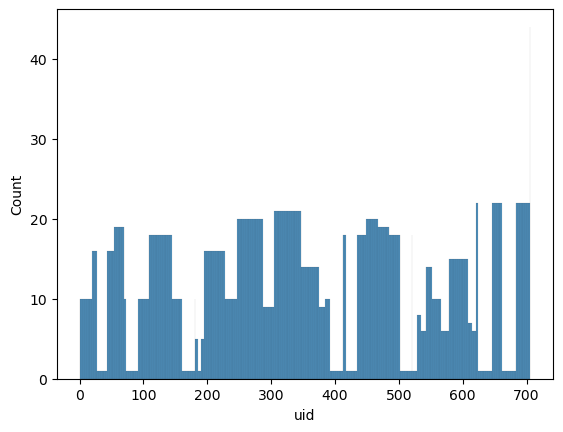

In [13]:
sns.histplot(data.uid, binwidth=1)

Regroupement de 2 colonnes souvent utilisée.

In [14]:
data['gender, decision']=data[['gender','decision']].apply(lambda x : str(x[0])+', '+str(x[1]), axis=1)


# Description des colonnes

In [15]:
print(data.columns)

Index(['wave', 'gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'field',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitious_o',
       'shared_interests_o', 'pref_attractive', 'pref_sincere',
       'pref_intelligence', 'pref_funny', 'pref_ambition',
       'pref_shared_interests', 'attractive', 'sincere', 'intelligence',
       'funny', 'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'expected_happy_with_sd_people',
       'expected_num_int

Il y a un nombre élevé de colonnes, mais on peut les répartir en un nombre plus réduit de catégories, dont certaines se traiteraient de façon identique.

## Éléments demographiques

In [16]:
print('Session de speed dating :')
print(list(data.columns[0:1]))
print('Genre :')
print(list(data.columns[1:2]))
print('Age :')
print(list(data.columns[2:4]))
print('Race et religion :')
print(list(data.columns[4:9]))
print("Domaine d'études :")
print(list(data.columns[9:10]))

Session de speed dating :
['wave']
Genre :
['gender']
Age :
['age', 'age_o']
Race et religion :
['race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion']
Domaine d'études :
['field']


### Age

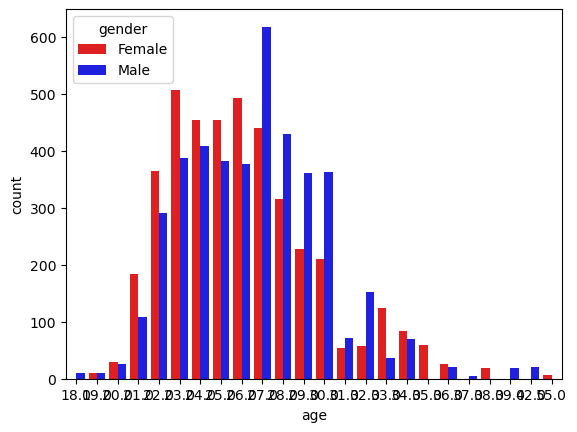

In [17]:
fig=sns.countplot(x='age', data=data, hue='gender', palette=('red', 'blue'))

In [18]:
# for i in data
data.groupby('age').age.count()

age
18.0      10
19.0      20
20.0      55
21.0     291
22.0     655
23.0     894
24.0     863
25.0     837
26.0     869
27.0    1059
28.0     746
29.0     589
30.0     574
31.0     125
32.0     210
33.0     161
34.0     152
35.0      60
36.0      45
37.0       5
38.0      19
39.0      18
42.0      20
55.0       6
Name: age, dtype: int64

In [19]:
# for i in data.wave :
#     print(data[data.wave == i].groupby('age').age.count())

### Race

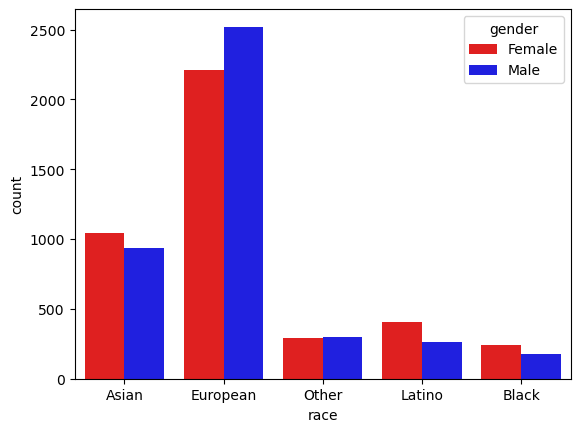

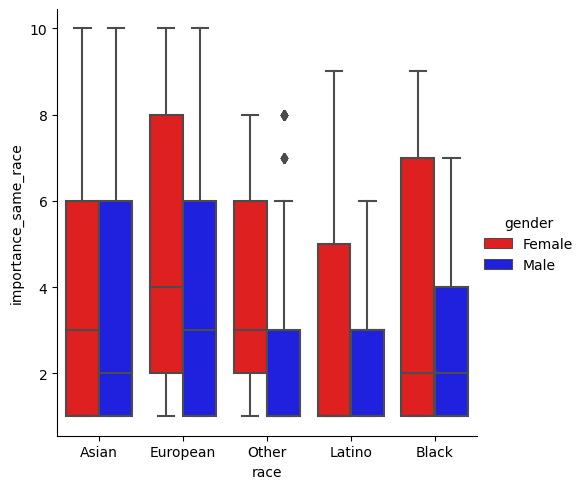

In [20]:
sns.countplot(x='race', data=data, hue='gender', palette=('red', 'blue'))
sns.catplot(data=data,  x='race', y='importance_same_race', kind='box', hue='gender', palette=('red', 'blue'))

### Domaine d'études

à faire plus tard si je traite la partie field

In [21]:
list_field=np.unique(data.field)
# print(list_field)
print(len(list_field))

# for i in list_field : 
#     data.replace( , "", inplace=True)

260


## Attributs

In [22]:
print("Attributs (pref_o_):")
print(list(data.columns[10:16]))
ind_pref_o=data.columns[10:16]
print("Attributs (_o):")
print(list(data.columns[16:22]))
ind_o=data.columns[16:22]
print("Attributs (pref_):")
print(list(data.columns[22:28]))
ind_pref=data.columns[22:28]
print("Attributs (base):")
print(list(data.columns[28:33]))
ind_base=data.columns[28:33]
print("Attributs (_partner):")
print(list(data.columns[33:39]))
ind_partner=data.columns[33:39]

Attributs (pref_o_):
['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
Attributs (_o):
['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitious_o', 'shared_interests_o']
Attributs (pref_):
['pref_attractive', 'pref_sincere', 'pref_intelligence', 'pref_funny', 'pref_ambition', 'pref_shared_interests']
Attributs (base):
['attractive', 'sincere', 'intelligence', 'funny', 'ambition']
Attributs (_partner):
['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner']


Chaque individu est décrit par 5 ou 6 attributs : 
- 'attractive',
- 'sincere',
- 'intelligent',
- 'funny',
- 'ambitious'
- 'shared interests', si applicable

Ces attributs sont utilisés dans 5 contextes différents. On a les catégories (on prendra le premier attribut 'attractive' pour l'exemple):
- pref_attractive : Importance donnée à l'attribut par le sujet
- pref_o_attractive : équivalent pour le partenaire
- attractive : auto-évaluation par le sujet
- attractive_o : évaluation du sujet par le partenaire 
- attractive_partner : évaluation du partenaire par le sujet

### Préférences déclarées

In [23]:
data[ind_pref].describe()

,pref_attractive,pref_sincere,pref_intelligence,pref_funny,pref_ambition,pref_shared_interests
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,22.372055,17.412582,20.249843,17.468658,10.661585,11.835277
std,12.417955,7.039642,6.781284,6.078455,6.017440,6.352217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,17.390000,15.000000,5.000000,9.519048
50%,20.000000,18.181818,20.000000,18.000000,10.000000,11.000000
75%,25.000000,20.000000,23.080000,20.000000,15.000000,16.000000
max,100.000000,60.000000,50.000000,50.000000,35.810811,30.000000


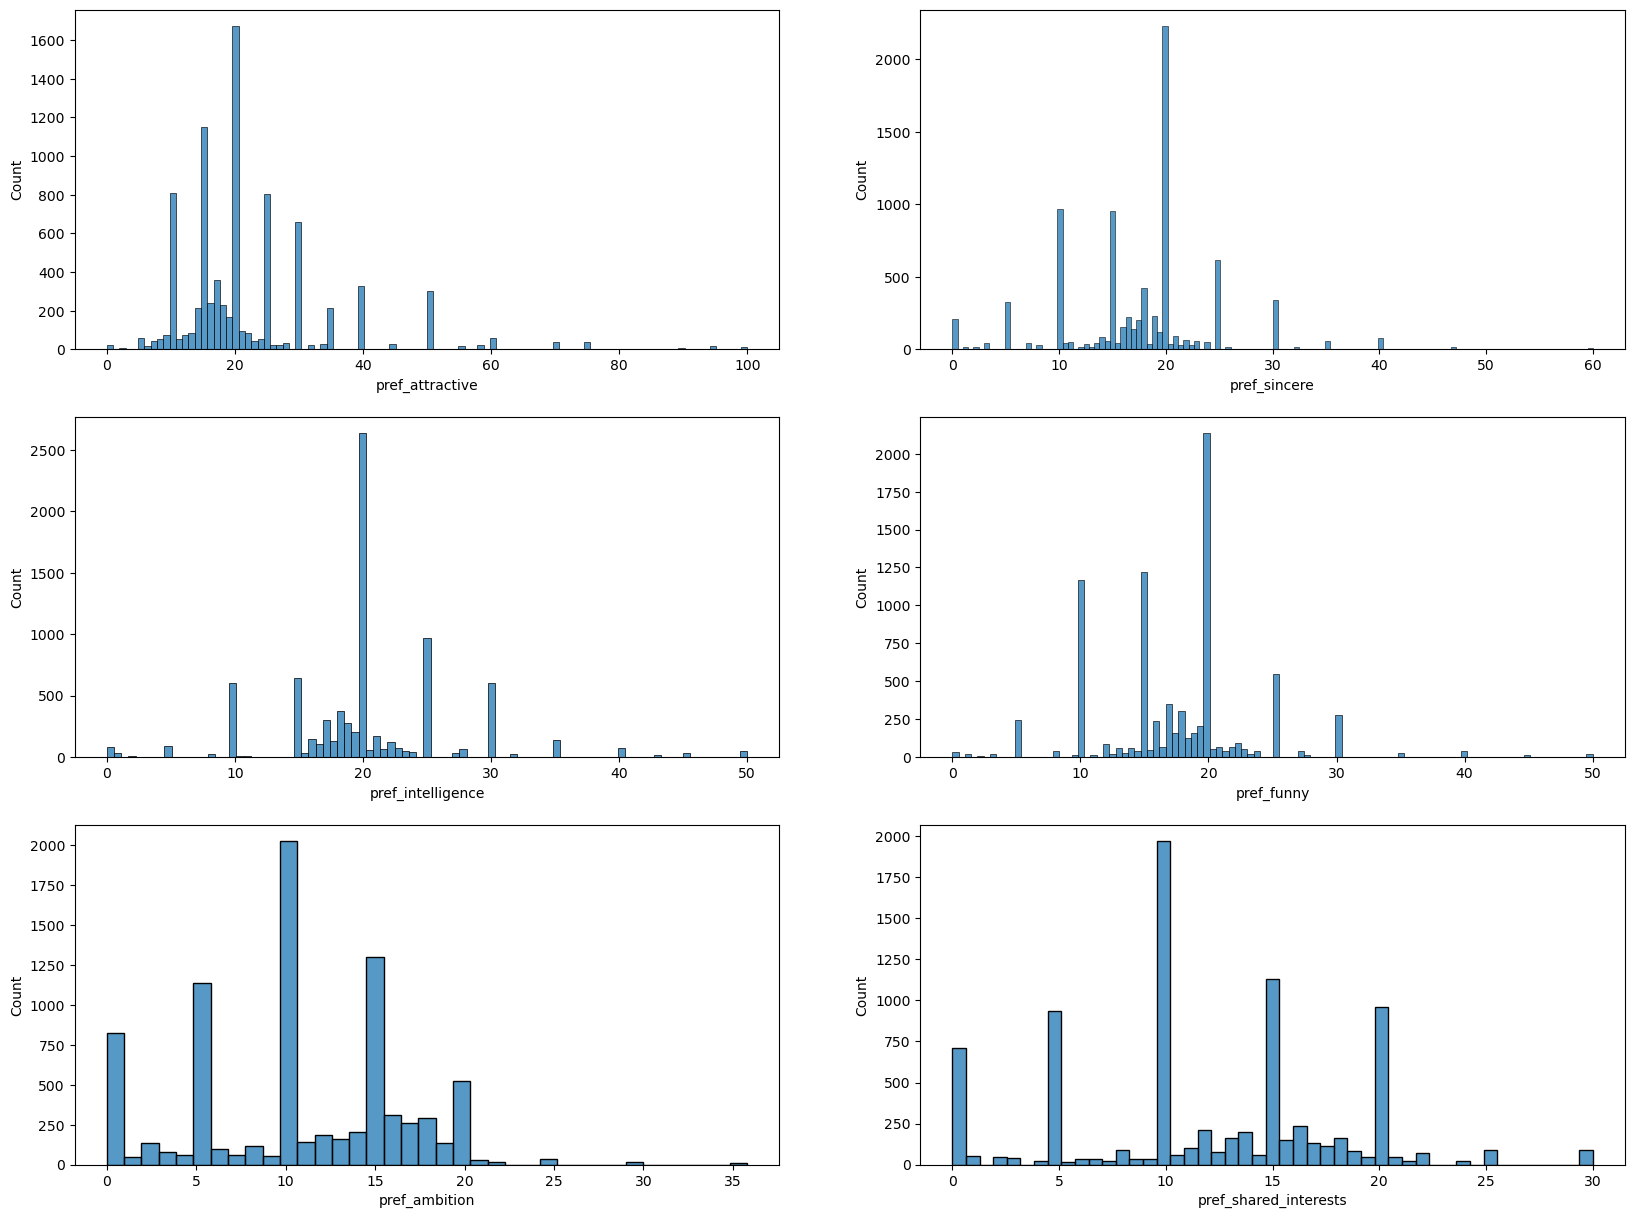

In [24]:
fig=plt.figure(figsize=(20,15))
for i in range(6) :
    fig.add_subplot(3,2,i+1)
    sns.histplot(data[ind_pref[i]])

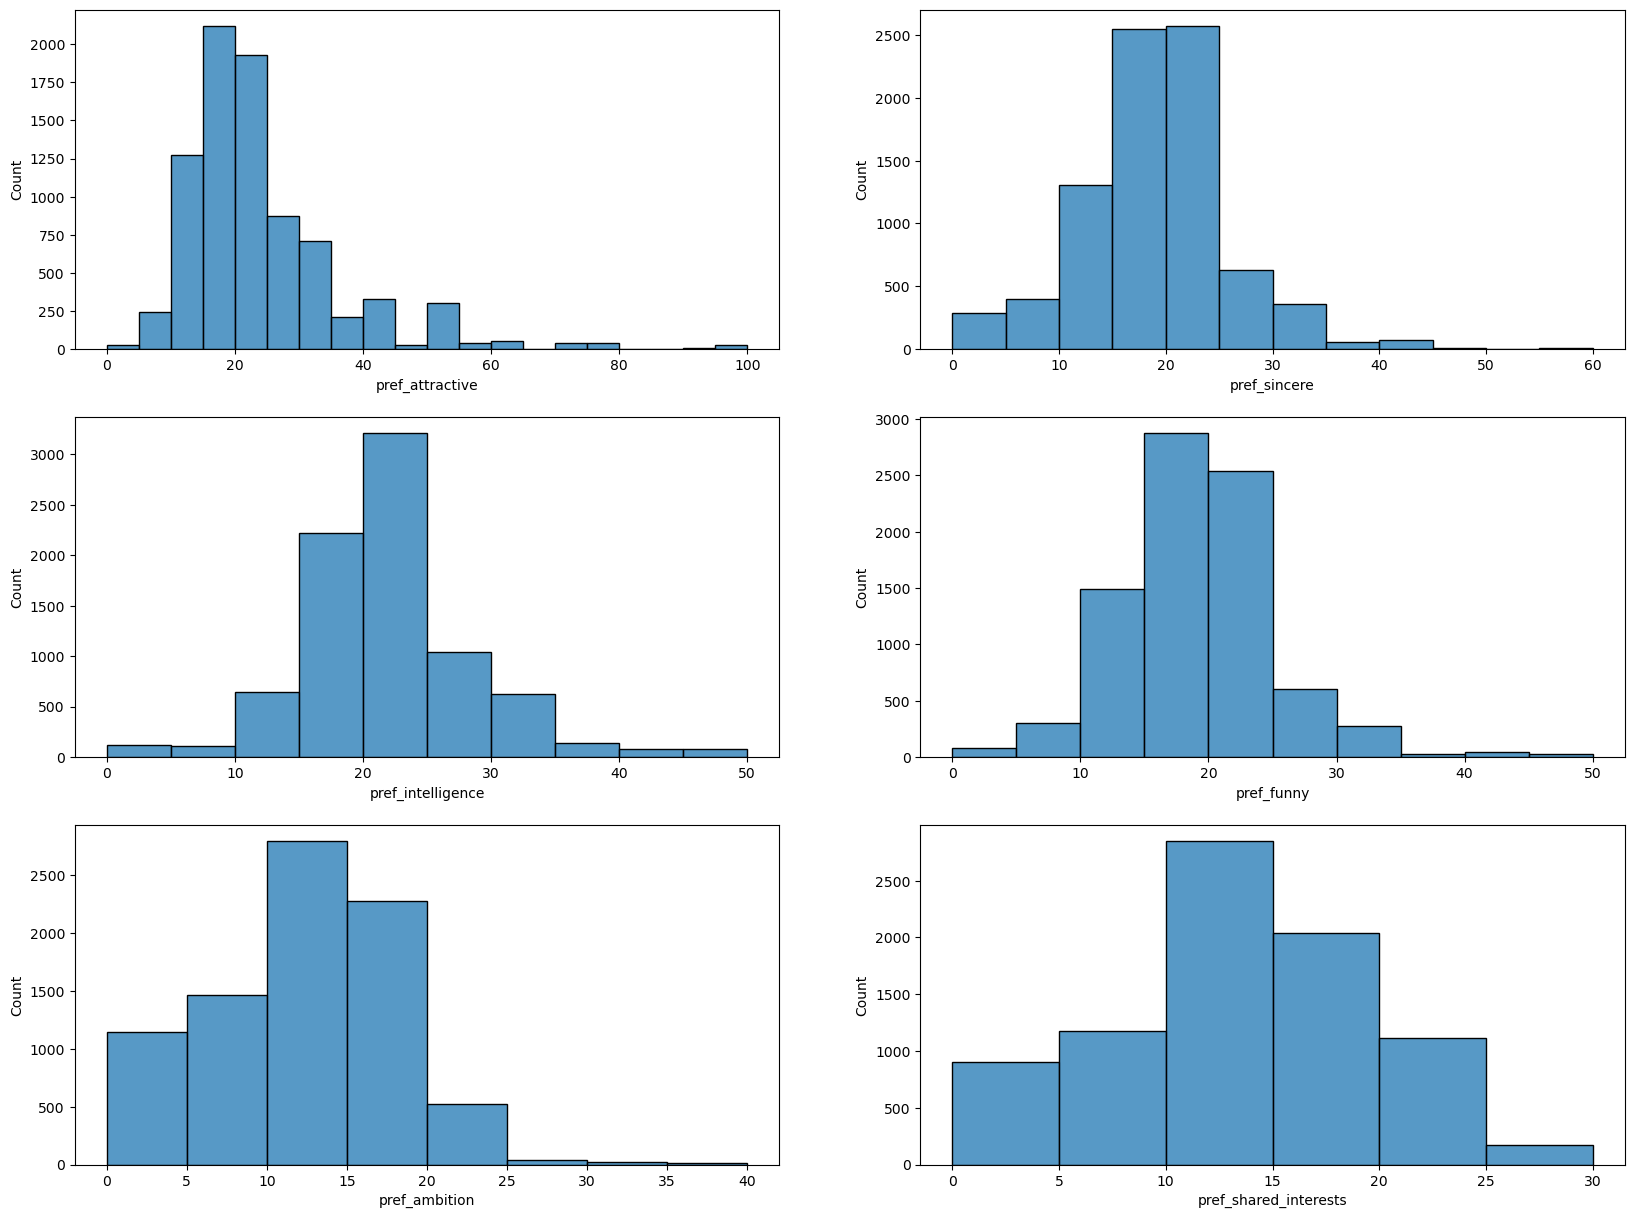

In [25]:
fig=plt.figure(figsize=(20,15))
for i in range(6) :
    fig.add_subplot(3,2,i+1)
    sns.histplot(data[ind_pref[i]], binwidth=5)

### Auto-évaluation

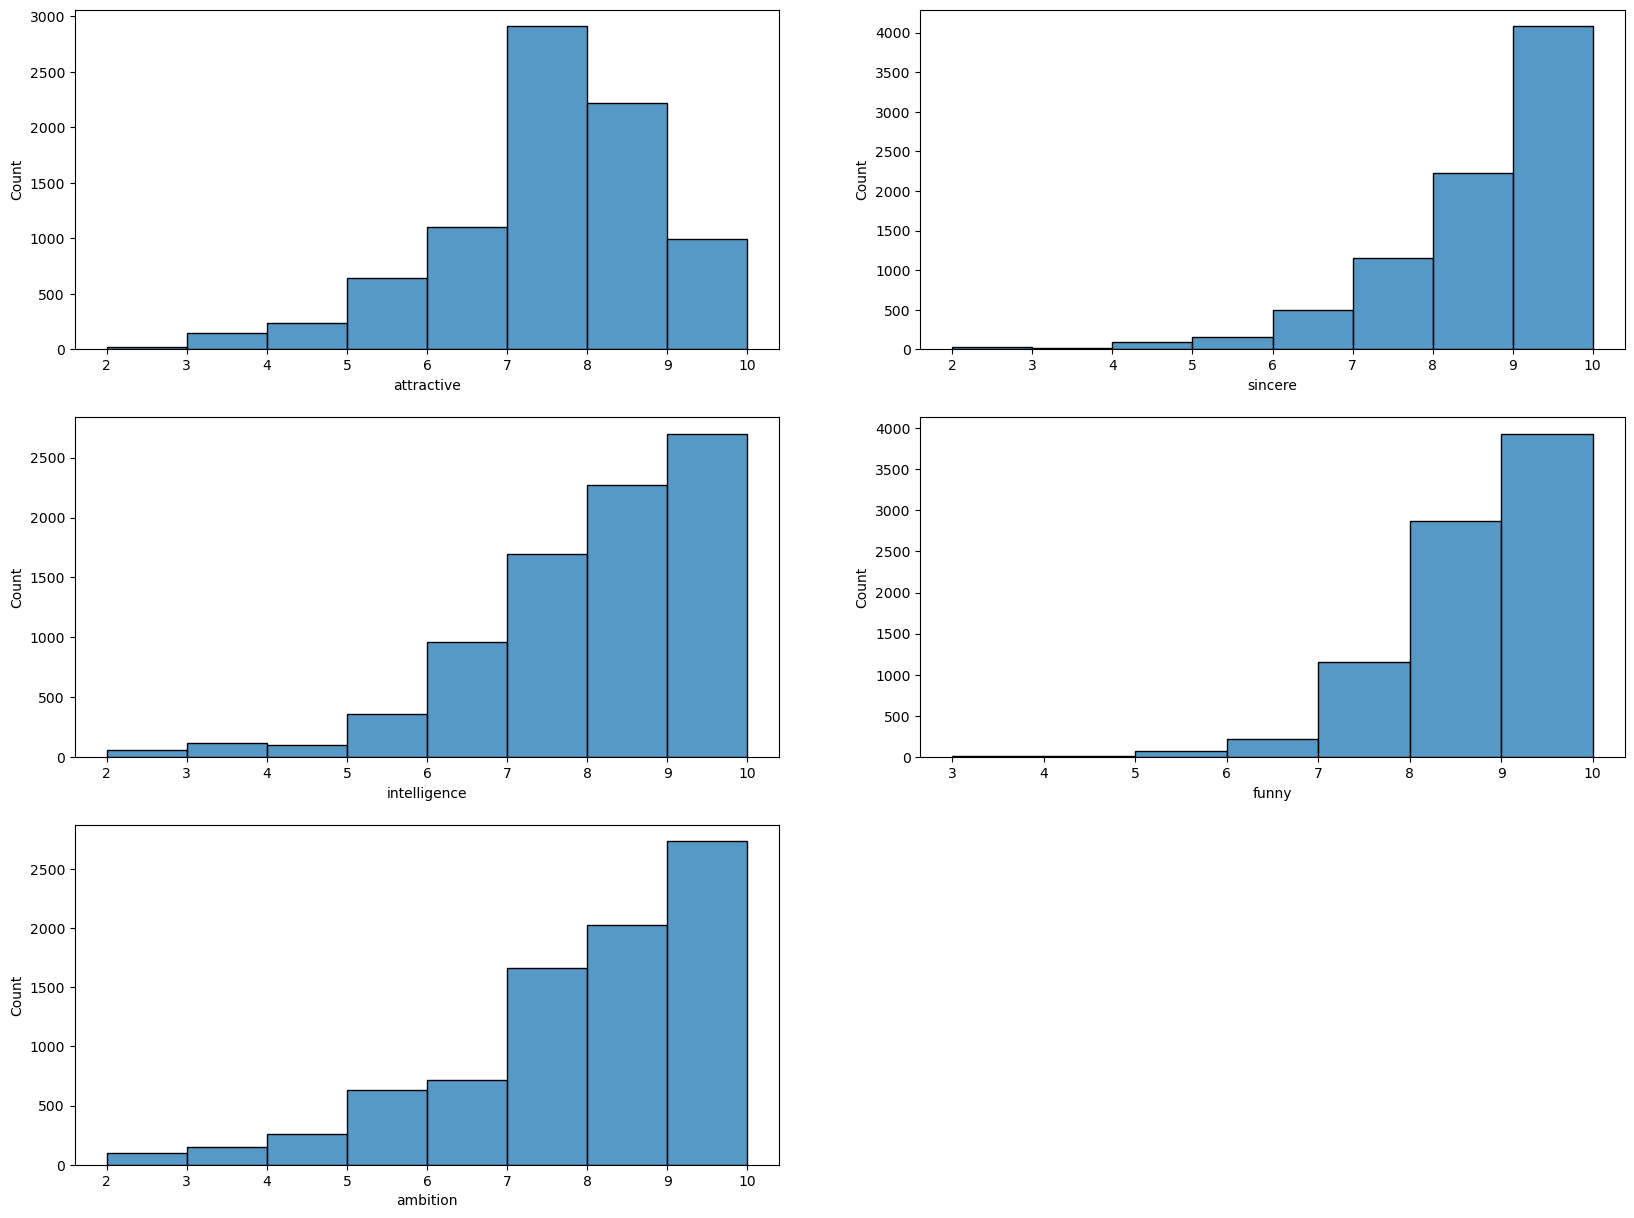

In [26]:
fig=plt.figure(figsize=(20,15))
for i in range(5) :
    fig.add_subplot(3,2,i+1)
    sns.histplot(data[ind_base[i]], binwidth=1)

### Évaluation par les autres

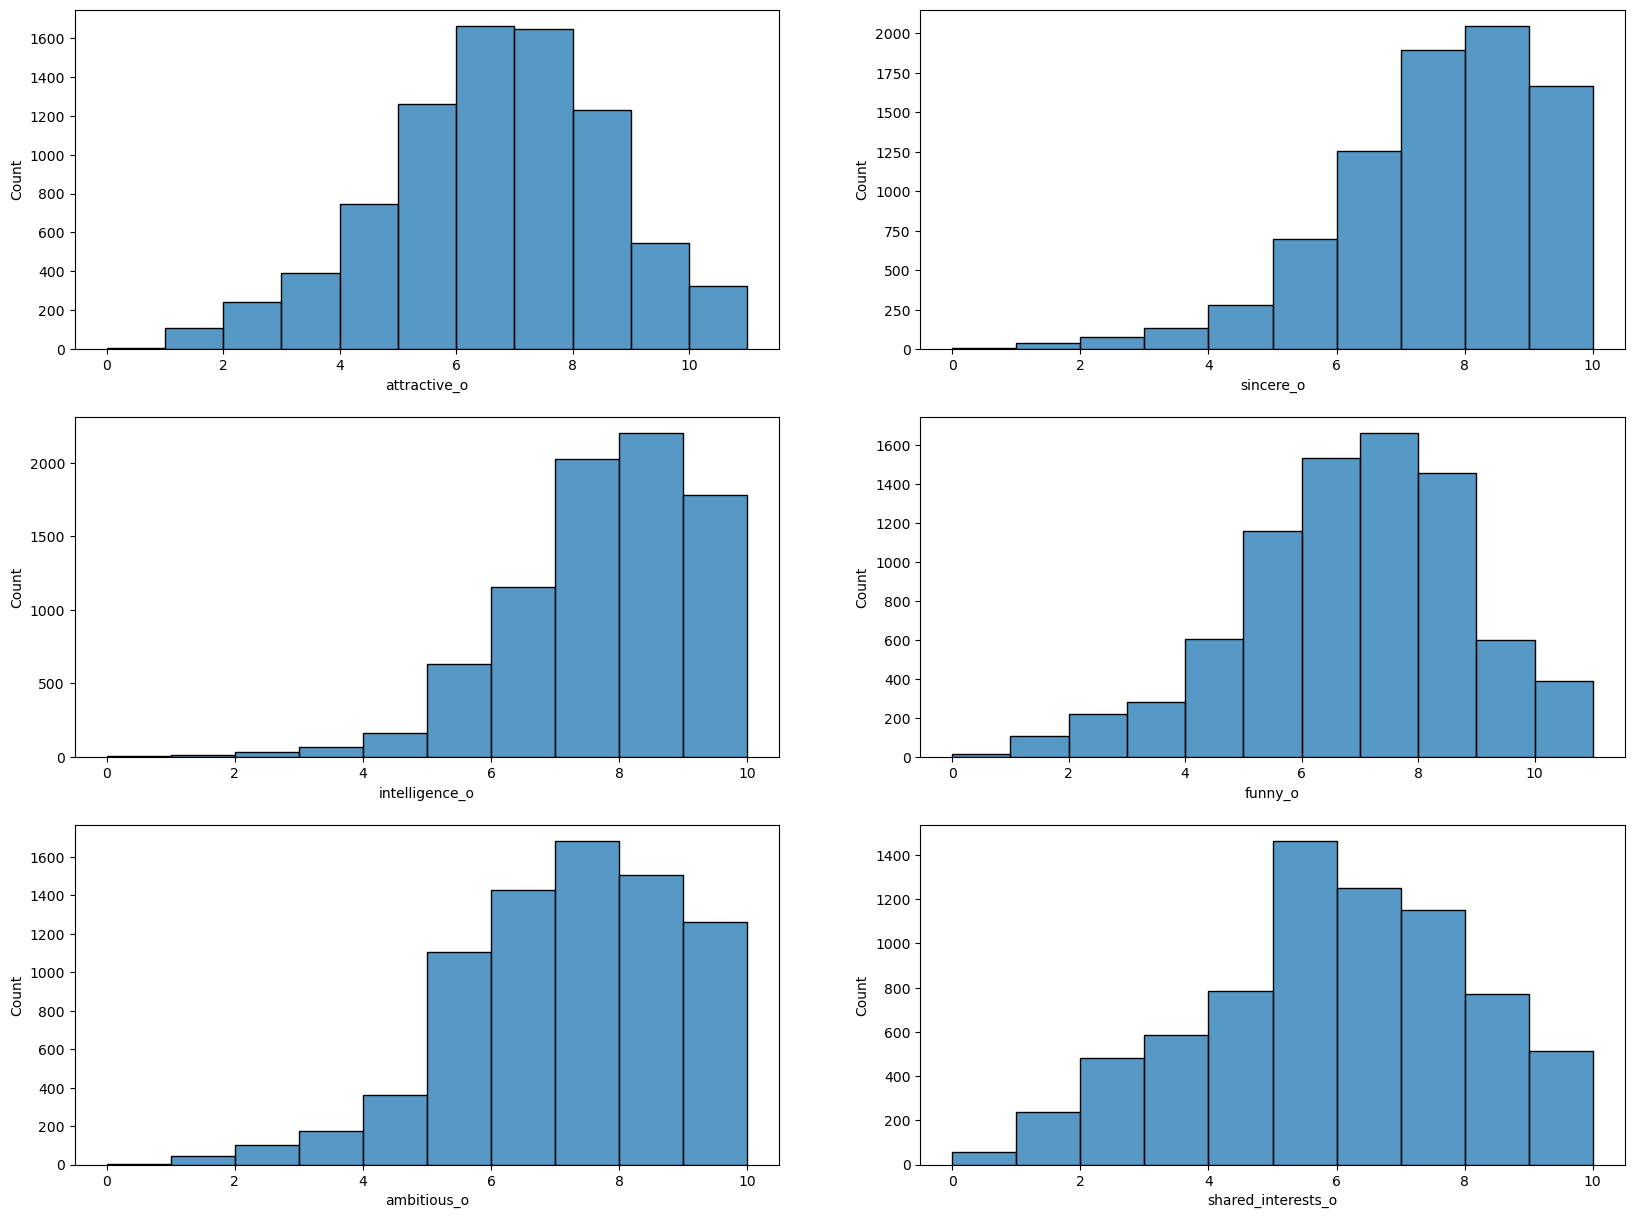

In [27]:
fig=plt.figure(figsize=(20,15))
for i in range(6) :
    fig.add_subplot(3,2,i+1)
    sns.histplot(data[ind_o[i]], binwidth=1)

## Activités

In [28]:
print('Intérêts / activités')
print(list(data.columns[39:57]))
ind_activ=data.columns[56]

Intérêts / activités
['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate']


Les sujets indiquent leur intérêt de 1 à 10 pour plusieurs activités. 

Une corrélation ('interests_correlate') est effectuée entre leur vecteur d'activité et celui de leur partenaire pour déterminer le sixième attribut, et c'est le seul terme qui est directement utilisé.

## KPI et divers

In [29]:
print('kpi')
print(list(data.columns[57:]))

kpi
['expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'decision_o', 'match', 'pref_tot', 'pref_tot_o', 'uid', 'gender, decision']


Il y a plusieurs termes qu'on ignorera portant sur l'estimation par le sujet de divers éléments.

Les termes importants sont :
- 'like' : score de 1 à 10 de l'appréciation du partenaire par le sujet
- 'decision' : le fait que le sujet demande à revoir le partenaire
- 'decision_o' : le fait que le partenaire demande à revoir le sujet
- 'match' : vaut 'decision' AND 'decision_o'

On pourra avant tout catégoriser l'effet des divers éléments selon la valeur de 'decision' correspondant.


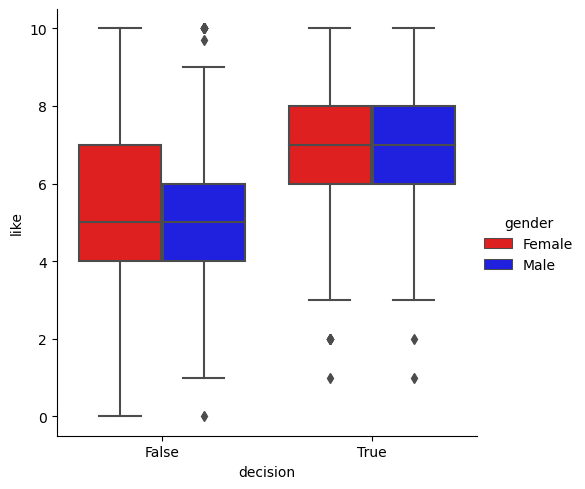

In [30]:
sns.catplot(data=data, y='like', x='decision', kind='box' , hue='gender', palette=('red', 'blue'))


<AxesSubplot:xlabel='decision', ylabel='count'>

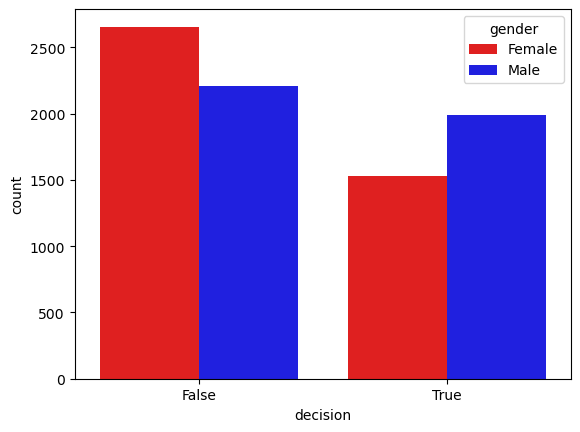

In [31]:
# sns.countplot(data=data, x='decision' hue='gender')

sns.countplot(x='decision', data=data, hue='gender', palette=('red', 'blue'))

# Effets des colonnes sur le KPI

## Effet de l'age

In [32]:
if not 'age_diff' in data.columns :
    data['age_diff']=data['age']-data['age_o']


In [33]:
# data['age_crit']=(data['age']-data['age_o'])/(data['age']/2-7)

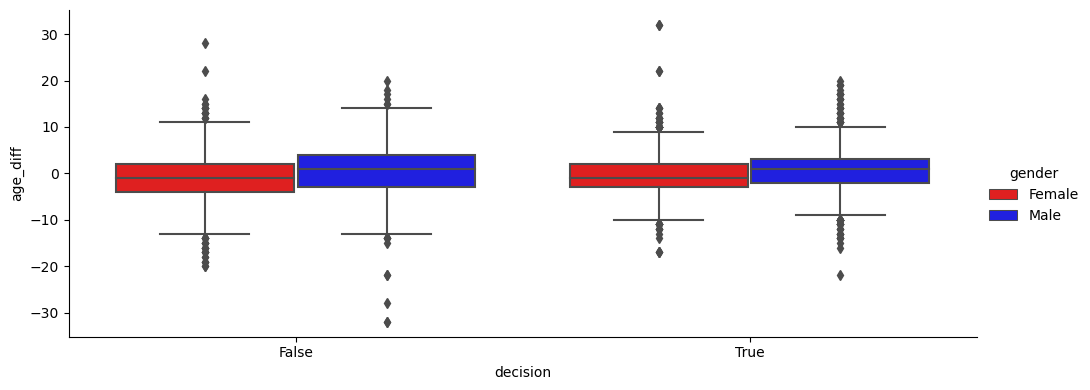

In [34]:
fig=sns.catplot(x='decision', y='age_diff', data=data, hue='gender', palette=('red', 'blue'), 
                height=4, aspect=2.5, kind='box')

In [35]:
# fig=sns.catplot(x='decision', y='age_crit', data=data, hue='gender', palette=('red', 'blue'), 
#                 height=4, aspect=2.5, kind='box')

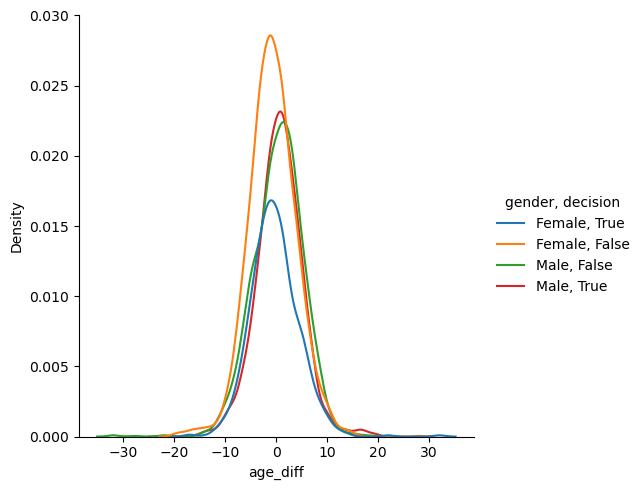

In [36]:

sns.displot(x='age_diff', data=data , hue='gender, decision' ,kind='kde')


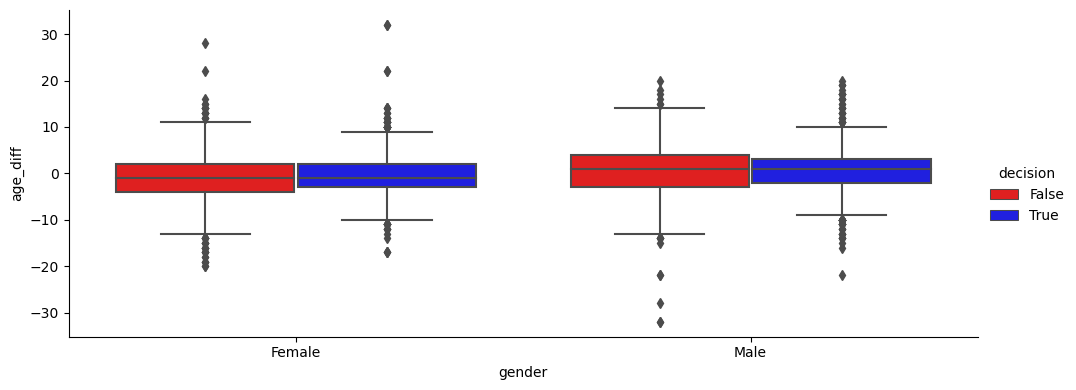

In [37]:
fig=sns.catplot(hue='decision', y='age_diff', data=data, x='gender', palette=('red', 'blue'), 
                height=4, aspect=2.5, kind='box')

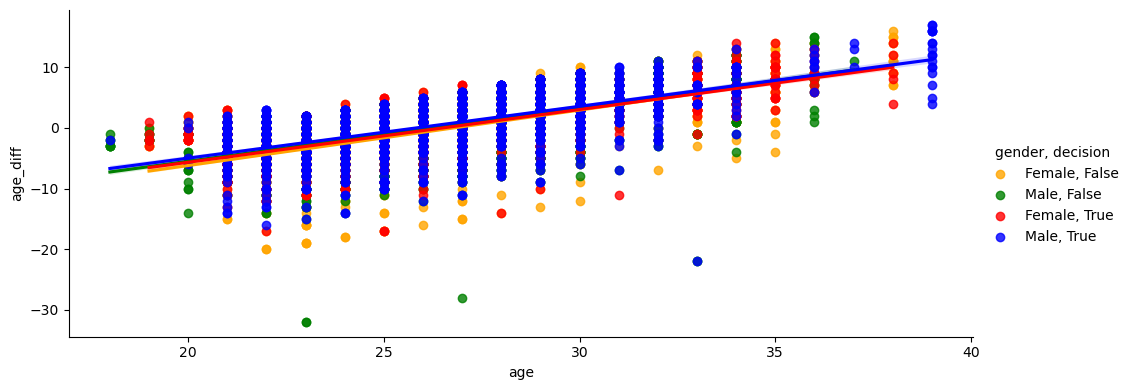

In [38]:
hue_order=['Female, False','Male, False','Female, True','Male, True'] #
fig=sns.lmplot(x='age', y='age_diff', data=data[data['age'] < 40], 
               hue='gender, decision', hue_order=hue_order, palette=('orange', 'green', 'red', 'blue'), 
               height=4, aspect=2.5)

In [39]:
#  fig=sns.lmplot(x='age', y='age_o', data=data[data['age'] < 40], hue='gender', palette=('red', 'blue'), 
#                    col=('decision'), height=4, aspect=2.5)

In [40]:
#  fig=sns.lmplot(x='age', y='age_o', data=data[data['age'] < 40], hue='gender', palette=('red', 'blue'), 
#                    col=('match'), height=4, aspect=2.5)

## Effet de la race

## Effet des attributs

### Relation auto-évaluation (attribut) / évaluation par les autres (attribut_o)

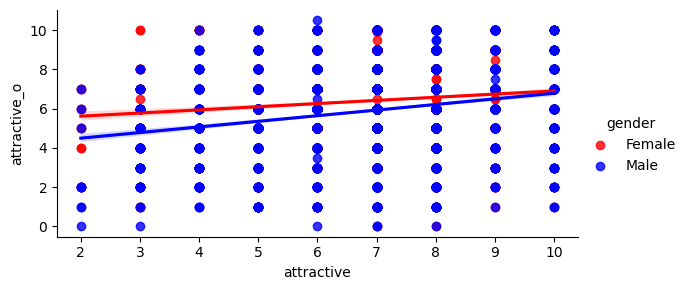

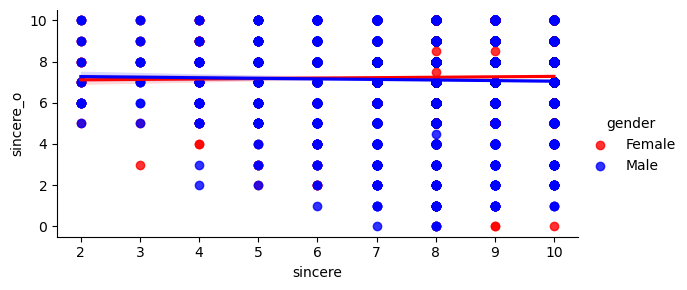

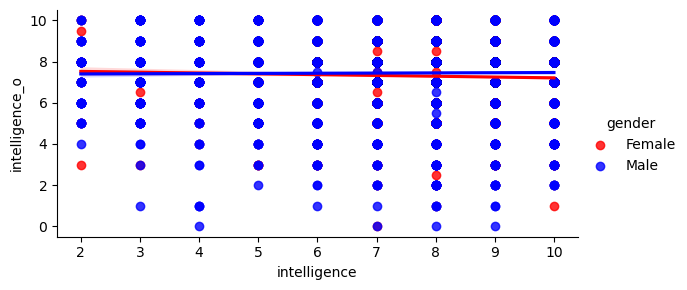

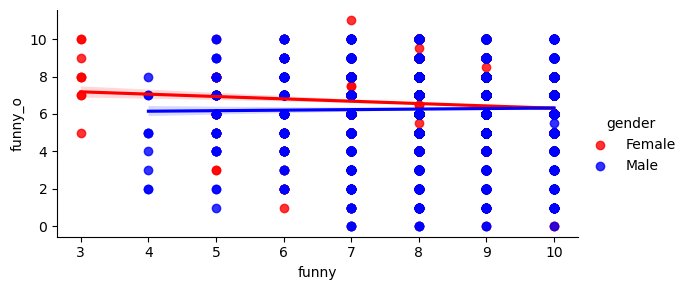

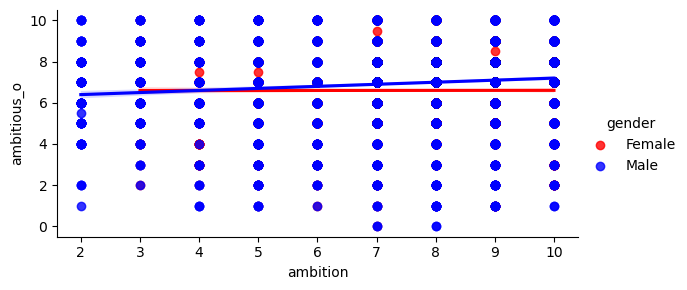

In [41]:
for i in range(5) :
    fig=sns.lmplot(data=data, x=ind_base[i], y=ind_o[i], hue='gender', palette=('red', 'blue'), 
                   height=3, aspect=2)


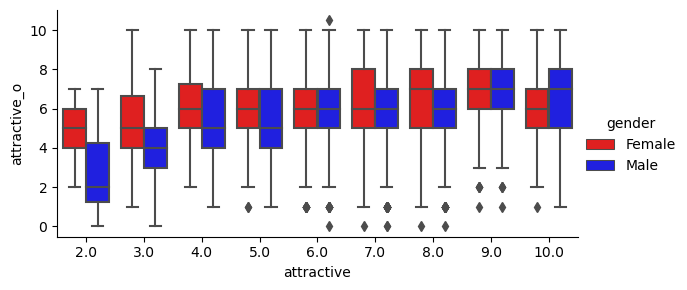

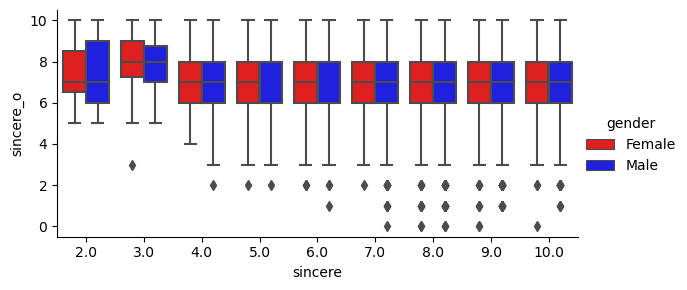

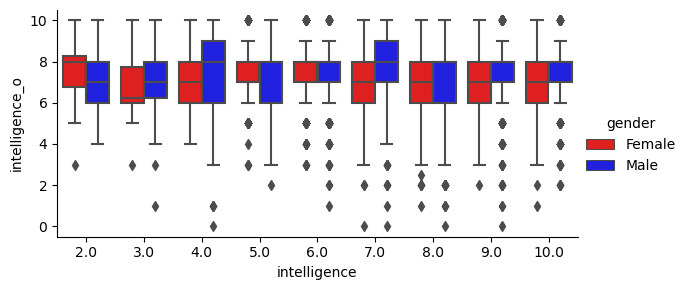

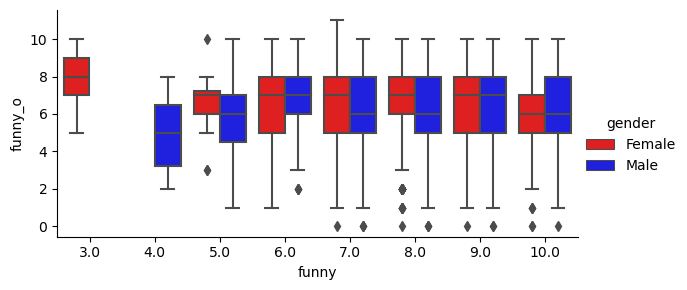

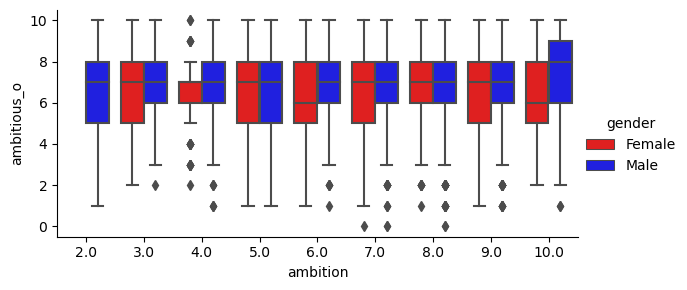

In [42]:

for i in range(5) :
    fig=sns.catplot(data=data, x=ind_base[i], y=ind_o[i], hue='gender', palette=('red', 'blue'), 
                    kind='box', height=3, aspect=2)


L'auto-évaluation n'a pas réellement de lien avec l'évaluation par les autres. On utilisera donc systématiquement les évaluations des ou par les autres ('attribute_o' et 'attribute_partner') et jamais l'auto-évaluation ('attribute').

In [43]:
#donner une valeur moyenne pour chaque attribut?

### Relation preférence / attribut

In [44]:
data_like=  data[data['decision'] == 1]
data_like_o=data[data['decision_o'] == 1]

print(data[['pref_attractive', 'attractive_partner']].corr())
print(data_like[['pref_attractive', 'attractive_partner']].corr())



                    pref_attractive  attractive_partner
pref_attractive            1.000000            0.035231
attractive_partner         0.035231            1.000000
                    pref_attractive  attractive_partner
pref_attractive            1.000000            0.112266
attractive_partner         0.112266            1.000000


In [45]:
print(data[['pref_ambition', 'ambition_partner']].corr())
print(data_like[['pref_ambition', 'ambition_partner']].corr())



                  pref_ambition  ambition_partner
pref_ambition          1.000000          0.134077
ambition_partner       0.134077          1.000000
                  pref_ambition  ambition_partner
pref_ambition          1.000000          0.191308
ambition_partner       0.191308          1.000000


In [46]:
# for i in range(6) :
#     fig=sns.lmplot(x=ind_pref[i], y=ind_partner[i], data=data, hue='gender', palette=('red', 'blue'), 
#                    col=('decision'), height=4, aspect=2.5)


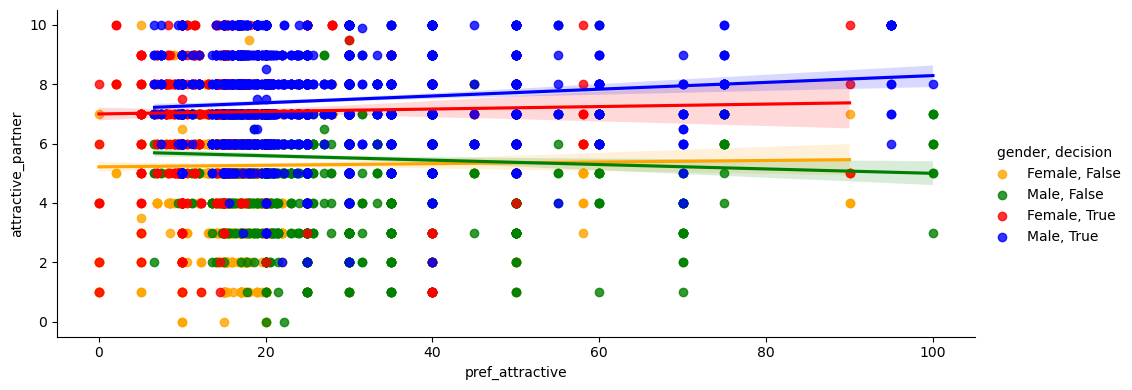

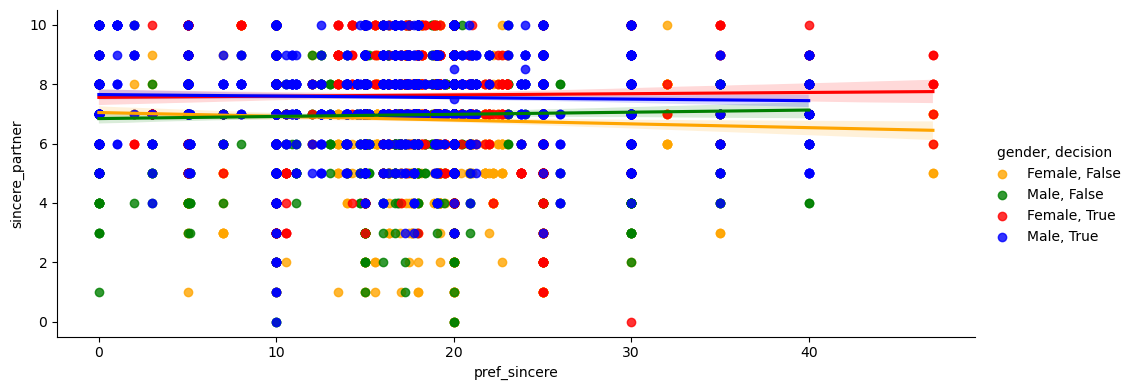

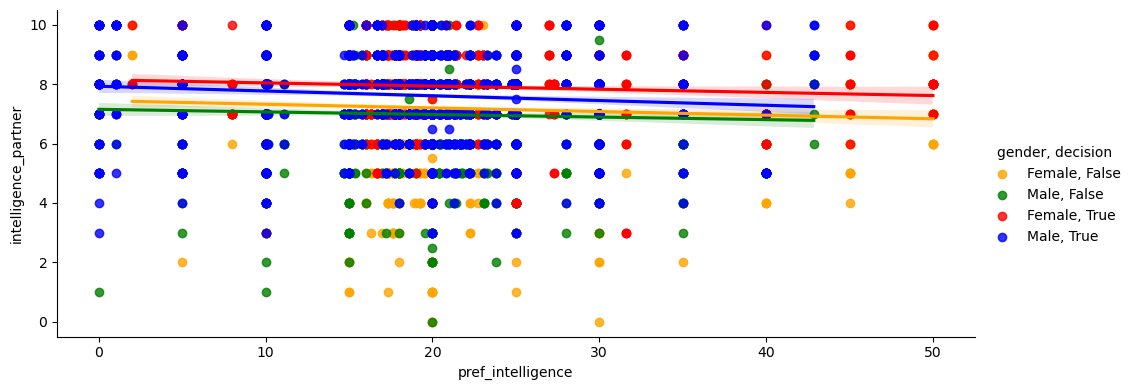

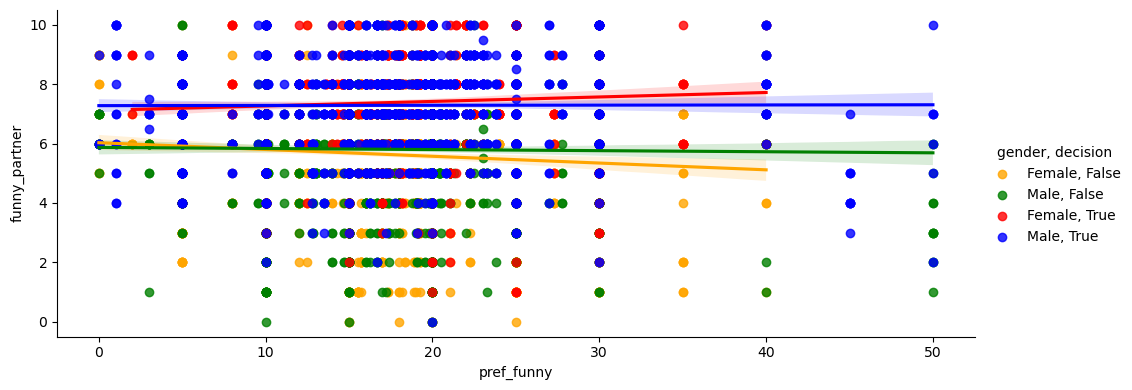

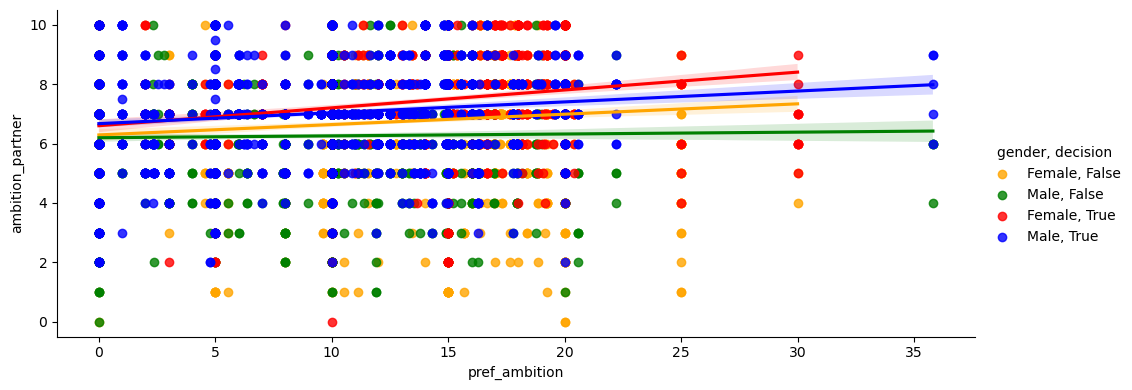

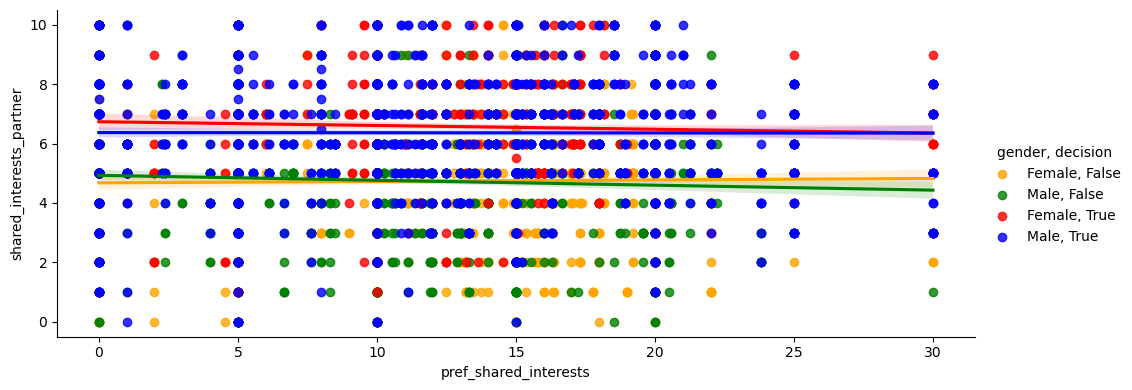

In [47]:
hue_order=['Female, False','Male, False','Female, True','Male, True'] #('orange', 'green', 'red', 'blue')
for i in range(6) :
    fig=sns.lmplot(x=ind_pref[i], y=ind_partner[i], data=data, 
               hue='gender, decision', hue_order=hue_order, 
               height=4, aspect=2.5, palette=('orange', 'green', 'red', 'blue'))
# fig=sns.lmplot(x=ind_pref[i], y=ind_partner[i], data=data, hue='gender', 
#                    height=4, aspect=2.5, ax=ax)


# corr==ind_pref[i], y=ind_partner[i]


In [48]:
# #Corrélation attribut par attribut entre l'importance d'un attribut et sa présence chez ceux
# # non choisis (gauche) et choisis (droite)

# fig=plt.figure(figsize=(20,30))
# for i in range(6) :
#     fig.add_subplot(6,2,2*i+1)
#     barr=sns.histplot(data.loc[data['decision']==0,(ind_import[i], ind_partner[i])], 
#                       x=ind_import[i], y=ind_partner[i], bins=(20,10))
#     fig.add_subplot(6,2,2*i+2)
#     barr=sns.histplot(data.loc[data['decision']==1,(ind_import[i], ind_partner[i])], 
#                       x=ind_import[i], y=ind_partner[i], bins=(20,10))
#


On regarde cependant un vecteur d'attributs, donc il faut trouver un moyen d'avoir un score pour les 6 termes à la fois

# Notes à supprimer, pour tests / vérifications

In [49]:

data.head(10)

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitious_o,shared_interests_o,pref_attractive,pref_sincere,pref_intelligence,pref_funny,pref_ambition,pref_shared_interests,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match,pref_tot,pref_tot_o,uid,"gender, decision",age_diff
0,1.0,Female,21.0,27.0,Asian,European,0,2.0,4.0,b'Law',35.000000,20.000000,20.000000,20.000000,0.000000,5.000000,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,True,False,False,100.0,100.00,0,"Female, True",-6.0
1,1.0,Female,21.0,22.0,Asian,European,0,2.0,4.0,b'Law',60.000000,0.000000,0.000000,40.000000,0.000000,0.000000,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,True,False,False,100.0,100.00,0,"Female, True",-1.0
2,1.0,Female,21.0,22.0,Asian,Asian,1,2.0,4.0,b'Law',19.000000,18.000000,19.000000,18.000000,14.000000,12.000000,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,True,True,True,100.0,100.00,0,"Female, True",-1.0
3,1.0,Female,21.0,23.0,Asian,European,0,2.0,4.0,b'Law',30.000000,5.000000,15.000000,40.000000,5.000000,5.000000,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,True,True,True,100.0,100.00,0,"Female, True",-2.0
4,1.0,Female,21.0,24.0,Asian,Latino,0,2.0,4.0,b'Law',30.000000,10.000000,20.000000,10.000000,10.000000,20.000000,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,True,True,True,100.0,100.00,0,"Female, True",-3.0
5,1.0,Female,21.0,25.0,Asian,European,0,2.0,4.0,b'Law',50.000000,0.000000,30.000000,10.000000,0.000000,10.000000,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,3.0,2.0,4.0,6.0,5.0,0.0,False,True,False,100.0,100.00,0,"Female, False",-4.0
6,1.0,Female,21.0,30.0,Asian,European,0,2.0,4.0,b'Law',35.000000,15.000000,25.000000,10.000000,5.000000,10.000000,3.0,6.0,7.0,5.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,7.0,4.0,6.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.34,3.0,2.0,4.0,6.0,5.0,0.0,True,False,False,100.0,100.00,0,"Female, True",-9.0
7,1.0,Female,21.0,27.0,Asian,European,0,2.0,4.0,b'Law',33.333333,11.111111,11.111111,11.111111,11.111111,22.222222,6.0,7.0,5.0,6.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,6.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.50,3.0,2.0,4.0,6.0,7.0,NaN,False,False,False,100.0,99.99,0,"Female, False",-6.0
8,1.0,Female,21.0,28.0,Asian,European,0,2.0,4.0,b'Law',50.000000,0.000000,25.000000,10.000000,0.000000,15.000000,7.0,7.0,8.0,8.0,8.0,9.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,9.0,8.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0

In [50]:
iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,
age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,
attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,
like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,
goal,date,go_out,career,career_c,
sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,
exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,
attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,
attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,
attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,
attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,
dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,
attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,
satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,
attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,
attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,
you_call,them_cal,date_3,numdat_3,num_in_3,
attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3

SyntaxError: invalid syntax (924570704.py, line 4)

In [ ]:
1,1,0,1,1,1,10,7,,4,1,11,0,0.14,0,
27,2,35.00,20.00,20.00,20.00,0.00,5.00,0,
6.00,8.00,8.00,8.00,8.00,6.00,
7.00,4.00,2,21,Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",
2,7,1,lawyer,,
9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,
3,2,15.00,20.00,20.00,15.00,15.00,15.00,
,,,,,,
35.00,20.00,15.00,20.00,5.00,5.00,
6,8,8,8,7,
,,,,,
1,6.00,9.00,7.00,7.00,6.00,5.00,7.00,6.00,2,4.00,
,,,,,,,,,,,
6,2,1,,,,,,,
19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,
6,7,8,7,6,,,,,,
1,1,0,,,
15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,

In [ ]:
                                         pf_o_att                              attr_o                                                                                                                                                     attr1_1                                   attr2_1                           attr3_1          attr                          like,prob, met,match,                   attr1_2,                                        attr3_2                attr1_3,                                              attr3_3     
1,1,0,1,1,1,10,7,,4,1,11,0,0.14,0,27,2,  35.00,20.00,20.00,20.00,0.00,5.00,0,  6.00,8.00,8.00,8.00,8.00,6.00,7.00,4.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,6.00,9.00,7.00,7.00,6.00,5.00,7.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,3,2,12,0,0.54,0,22,2,  60.00, 0.00, 0.00,40.00,0.00,0.00,0,  7.00,8.00,10.00,7.00,7.00,5.00,8.00,4.00,2,21,        Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,8.00,7.00,8.00,5.00,6.00,7.00,5.00,1,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,10,3,13,1,0.16,1,22,4, 19.00,18.00,19.00,18.00,14.00,12.00,1,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,1,21, Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,8.00,9.00,8.00,5.00,7.00,7.00,    ,1,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,5,4,14,1,0.61,0,23,2,  30.00,5.00,15.00,40.00,5.00,5.00,1,   7.00,8.00,9.00,8.00,9.00,8.00,7.00,7.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,8.00,7.00,6.00,8.00,7.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,7,5,15,1,0.21,0,24,3,  30.00,10.00,20.00,10.00,10.00,20.00,1,8.00,7.00,9.00,6.00,9.00,7.00,8.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,6.00,7.00,7.00,6.00,6.00,6.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,6,6,16,0,0.25,0,25,2,  50.00,0.00,30.00,10.00,0.00,10.00,1,  7.00,7.00,8.00,8.00,7.00,7.00,7.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,0,4.00,9.00,7.00,4.00,6.00,4.00,6.00,5.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,1,7,17,0,0.34,0,30,2,  35.00,15.00,25.00,10.00,5.00,10.00,0, 3.00,6.00,7.00,5.00,8.00,7.00,2.00,1.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,7.00,4.00,6.00,7.00,6.00,5.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,2,8,18,0,0.50,0,27,2,  33.33,11.11,11.11,11.11,11.11,22.22,0,6.00,7.00,5.00,6.00,8.00,6.00,7.00,5.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,0,4.00,9.00,7.00,6.00,5.00,6.00,6.00,7.00, ,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,8,9,19,1,0.28,0,28,2,  50.00,0.00,25.00,10.00,0.00,15.00,1,  7.00,7.00,8.00,8.00,8.00,9.00,6.50,8.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,8.00,9.00,8.00,8.00,7.00,7.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,9,10,20,0,-0.36,0,24,2,100.00,0.00,0.00,0.00,0.00,0.00,0,    6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,6.00,6.00,8.00,10.00,8.00,6.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	


Association des attributs : 

Fichier orig : 
    
ct :
attr1_1 ; poids
attr2_1 : poids
attr3_1 : val  6,8,8,8,7
attr1_2 ; poids, inutilisé
attr3_2 : val  6,7,8,7,6
attr1_3 : poids
attr3_3 : val  5,7,7,7,7

var : 
pf_o_att 
attr_o  6.00,8.00,8.00,8.00,8.00,6.00
attr    6.00,9.00,7.00,7.00,6.00,5.00



Fichier actuel : 
    
ct :
attractive_important  : poids
attractive            : val  6,8,8,8,7

var : 
pref_o_attractive     : poids
attractive_o          : val  6.0 8.0 8.0 8.0 8.0 6.0
attractive_partner    ; val  6.0 9.0 7.0 7.0 6.0 5.0



En résumé, on a les champs ;
attractive_important : Importance donnée aux attributs par le sujet
pref_o_attractive : équivalent pour le partenaire
    
attractive : auto-évaluation par le sujet
attractive_o : évaluation du sujet par le partenaire (rating by partner the night of the event, for all 6 attributes)
attractive_partner : évaluation du partenaire par le sujet